# Investigación Corta 1

Pandas es la biblioteca de Python más popular que se utiliza para la manipulación y el análisis de datos, esta biblioteca es una extensión de NumPy. 

En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.

Exixten 2 tipos de datos que se pueden analizar con Pandas:
    
    - Series: Son arreglos de 1 dimensión.
    - DataFrames: Son arreglos de 2 o más dimensiones organizados en filas y columnas.
    
En este tutorial se usarán los DataFrames por ser el tipo de datos más utilizado y más complejo. Además se utilizan los siguientes sets de datos descargados de Kaggle:

    https://www.kaggle.com/nishantbhadauria/messi-vs-ronaldo-vs-neymar
    https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global#FullData.csv
    
Estos datos corresponden a las estadísticas de cada jugador de fútbol en el juego FIFA 2017.

## Parte 1: Tutorial de Pandas

Para poder utilizar la librería Pandas, lo primero que se debe hacer es importarla de la siguiente forma:

In [2]:
import numpy
import pandas

Una vez importada la librería, el siguiente paso el leer el set de datos con el que se quiere trabajar. En este caso se va a leer el archivo "soccer_players.csv" que contiene las estadísticas de Cristiano Ronaldo, Lionel Messi y Neymar agrupadas por habilidades primarias y secundarias. Estos datos se guardan en la variable "table".

In [3]:
table = pandas.read_csv('soccer_players.csv', delimiter = ',')
table

,Primary Skill,Secondary Skill,Cristiano Ronaldo,Lionel Messi,Neymar
0,Defence,Marking,22,13,21
1,Defence,Slide Tackle,23,26,33
2,Defence,Stand Tackle,31,28,24
3,Ball skills,Ball Control,93,95,95
4,Ball skills,Dribbling,92,97,96
5,Mental,Aggression,63,48,56
6,Mental,Reactions,96,95,88
7,Mental,Att. Position,94,93,90
8,Mental,Interceptions,29,22,36
9,Mental,Vision,85,90,80


Como se puede observar, las columnas tienen nombre y las filas tienen índices.

Si se quiere visualizar solo una parte de los datos, se pueden utilizar funciones como:
    
    - head():    Muestra las primeras 5 líneas.
    - tail():    Muestra las últimas 5 líneas.
    - sample(n): Muestra n líneas al azar.

A continuación se muestra un ejemplo:

In [4]:
table.sample(3)

,Primary Skill,Secondary Skill,Cristiano Ronaldo,Lionel Messi,Neymar
6,Mental,Reactions,96,95,88
17,Shooting,Long Shots,90,88,77
30,Goalkeeper,GK Diving,7,6,9


También se puede obtener el arreglo con los nombres de las columnas o con los indices de las filas de la siguiente forma:

In [5]:
table.columns.values

array(['Primary Skill', 'Secondary Skill', 'Cristiano Ronaldo',
       'Lionel Messi', 'Neymar'], dtype=object)

In [6]:
table.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

### Filtrado de Datos

Muchas veces también se desea agrupar los datos de diferentes formas para poder visualizarlos mejor o filtrar información que no es tan relevante. Pandas permite hacer esto con un sintaxis muy simple, simplemente se escribe el nombre de la variable que contiene los datos, en este caso "table", seguido de una expresión dentro de paréntesis cuadrados.

Por ejemplo, si se quiere extraer únicamente los datos correspondientes a "Shooting", simplemente se indica que se desea obtener todos los datos en los que la columna "Primary Skill" correspondan a "Shooting".

En el siguiente ejemplo se extraen esos datos y se guardan en la variable "shooting_stats".

In [7]:
shooting_stats = table[table['Primary Skill'] == 'Shooting']
shooting_stats

,Primary Skill,Secondary Skill,Cristiano Ronaldo,Lionel Messi,Neymar
14,Shooting,Heading,85,71,62
15,Shooting,Shot Power,92,85,78
16,Shooting,Finishing,93,95,89
17,Shooting,Long Shots,90,88,77
18,Shooting,Curve,81,89,81
19,Shooting,FK Acc.,76,90,84
20,Shooting,Penalties,85,74,81
21,Shooting,Volleys,88,85,83


También se podría desear un subset de los datos anteriores pero sólo para un jugador. En ese caso existen dos formas de hacerlo.

    - La primera es indicar cuáles columnas se desean:

In [8]:
shooting_stats[["Primary Skill", "Secondary Skill", "Cristiano Ronaldo"]]

,Primary Skill,Secondary Skill,Cristiano Ronaldo
14,Shooting,Heading,85
15,Shooting,Shot Power,92
16,Shooting,Finishing,93
17,Shooting,Long Shots,90
18,Shooting,Curve,81
19,Shooting,FK Acc.,76
20,Shooting,Penalties,85
21,Shooting,Volleys,88


    - La segunda es indicar cuáles columnas se desea descartar.

In [9]:
shooting_stats.drop(columns = ['Lionel Messi', 'Neymar'])

,Primary Skill,Secondary Skill,Cristiano Ronaldo
14,Shooting,Heading,85
15,Shooting,Shot Power,92
16,Shooting,Finishing,93
17,Shooting,Long Shots,90
18,Shooting,Curve,81
19,Shooting,FK Acc.,76
20,Shooting,Penalties,85
21,Shooting,Volleys,88


### Manipulaciones numéricas

También se pueden realizar diferentes cálculos con los datos que pueden ser útiles para realizar un análisis.

    - Obtener la media y la mediana (Los datos que son texto se ignoran automáticamente)

In [10]:
shooting_stats.mean()

Cristiano Ronaldo    86.250
Lionel Messi         84.625
Neymar               79.375
dtype: float64

In [11]:
shooting_stats.median()

Cristiano Ronaldo    86.5
Lionel Messi         86.5
Neymar               81.0
dtype: float64

    - Obtener la suma (Los datos que son texto se concatenan)

In [12]:
shooting_stats.sum()

Primary Skill        ShootingShootingShootingShootingShootingShooti...
Secondary Skill      HeadingShot PowerFinishingLong ShotsCurveFK Ac...
Cristiano Ronaldo                                                  690
Lionel Messi                                                       677
Neymar                                                             635
dtype: object

    - Obtener los valores mínimo y máximo (El parámetro ¨numeric_only¨ se coloca en True para que solo use los datos numéricos).

In [13]:
table.max(numeric_only = True)

Cristiano Ronaldo    96
Lionel Messi         97
Neymar               96
dtype: int64

In [14]:
table.min(numeric_only = True)

Cristiano Ronaldo    7
Lionel Messi         6
Neymar               9
dtype: int64

    - Realizar agrupamiento de valores. 
        
        En este caso se muestra un ejemplo de un agrupamiento utilizando la media.

In [15]:
summary = table.groupby('Primary Skill').mean()
summary

,Cristiano Ronaldo,Lionel Messi,Neymar
Primary Skill,,,
Ball skills,92.500000,96.000000,95.500000
Defence,25.333333,22.333333,26.000000
Goalkeeper,11.600000,10.800000,11.800000
Mental,75.500000,73.666667,71.666667
Passing,81.333333,84.000000,77.000000
Physical,86.142857,80.714286,79.142857
Shooting,86.250000,84.625000,79.375000


### Ordenar datos

Algo que generalmente se quiere hacer con los datos es ordenarlos de diferentes formas para análizarlos más fácilmente. Afortunadamente Pandas cuenta con la función sort_values() para poder hacer esto. Sólo se le debe indicar cómo se desea datos los datos en forma de parámetro.

A continuación se muestra un ejemplo en el que se ordena de la más alta a la más baja, las habilidades de Cristiano Ronaldo:


In [16]:
summary.sort_values('Cristiano Ronaldo', ascending = False)

,Cristiano Ronaldo,Lionel Messi,Neymar
Primary Skill,,,
Ball skills,92.500000,96.000000,95.500000
Shooting,86.250000,84.625000,79.375000
Physical,86.142857,80.714286,79.142857
Passing,81.333333,84.000000,77.000000
Mental,75.500000,73.666667,71.666667
Defence,25.333333,22.333333,26.000000
Goalkeeper,11.600000,10.800000,11.800000


### Manejo de datos faltantes

Puede ocurrir el caso de que el set de datos que se esté utilizando no esté completo y falten algunos datos. En estos casos se puede rellenar los datos faltantes usando la función fillna().

A continuación se muestra un ejemplo donde se va a eliminar un dato a propósito del set de datos:

In [17]:
summary['Lionel Messi'].Mental = 'NaN'
summary

,Cristiano Ronaldo,Lionel Messi,Neymar
Primary Skill,,,
Ball skills,92.500000,96.000000,95.500000
Defence,25.333333,22.333333,26.000000
Goalkeeper,11.600000,10.800000,11.800000
Mental,75.500000,NaN,71.666667
Passing,81.333333,84.000000,77.000000
Physical,86.142857,80.714286,79.142857
Shooting,86.250000,84.625000,79.375000


Se puede volver a llenar el dato faltante con la función fillna(), en este caso se va a calcular el valor faltante a partir del promedio de las otras habilidades de Lionel Messi.

In [18]:
summary.fillna(summary.mean())

,Cristiano Ronaldo,Lionel Messi,Neymar
Primary Skill,,,
Ball skills,92.500000,96.000000,95.500000
Defence,25.333333,22.333333,26.000000
Goalkeeper,11.600000,10.800000,11.800000
Mental,75.500000,63.078770,71.666667
Passing,81.333333,84.000000,77.000000
Physical,86.142857,80.714286,79.142857
Shooting,86.250000,84.625000,79.375000


### Unir sets de datos

Muchas veces se tienen sets de datos separados que comparten parte de su información y se desean fusionar en uno solo para poder realizar diferentes análisis.

Para ejemplificarlo mejor se desarrollará un ejemplo donde se buscó el set de datos completo de los jugadores de FIFA 2017. La idea es poder comparar a Bryan Ruíz con los 3 jugadores del primer set de datos.

Primero se procede a guardar los datos en la variable "full_data_set" y se revisa cuales columnas componen este nuevo set de datos.

In [19]:
full_data_set = pandas.read_csv('FullData.csv', delimiter = ',')
full_data_set.columns.values

array(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date',
       'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking',
       'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
       'Attacking_Position', 'Interceptions', 'Vision', 'Composure',
       'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
       'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading',
       'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes'],
      dtype=object)

Con la información anterior se nota que este set de datos tiene muchas columnas adicionales que no tiene el set anterior, y que no son de interés para el análisis que se va a realizar, por lo que se procede a extraer únicamente los datos de Bryan Ruíz de las columnas que son de interés usando lo que se explicó en las secciones anteriores.

In [20]:
bryan_ruiz = full_data_set[full_data_set.Name == 'Bryan Ruíz']
bryan_ruiz = bryan_ruiz[['Name', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 
                         'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position', 
                         'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
                         'Acceleration', 'Speed','Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
                         'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 
                         'Penalties', 'Volleys', 'GK_Positioning', 'GK_Diving', 'GK_Kicking',
                         'GK_Handling', 'GK_Reflexes']].set_index('Name')
bryan_ruiz

,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
Name,,,,,,,,,,,,,,,,,,,,,
Bryan Ruíz,85,85,45,48,57,33,75,78,49,80,...,77,83,74,71,79,7,9,12,7,6


Al observar el set de datos extraído, se nota que no tiene el mismo formato que el set de datos "table" y este es un requisito para poder unir ambos sets de datos. Por lo tanto de debe cambiar el formato de este segundo set de datos para hacerlo calzar con el otro.

#### Renombrar columnas
El primer paso es tener los nombres de las columnas iguales a los que tenían las columnas del primer set de datos. Entonces se deben renombrar con la siguiente instrucción en la que se especifican los nombres antiguos y nuevos de cada columna: 

In [21]:
bryan_ruiz.rename(columns={'Sliding_Tackle':'Slide Tackle', 'Standing_Tackle':'Stand Tackle',
                           'Ball_Control':'Ball Control', 'Attacking_Position':'Att. Position', 
                           'Short_Pass':'Short Pass', 'Long_Pass':'Long Pass', 'Shot_Power':'Shot Power', 
                           'Long_Shots':'Long Shots', 'Freekick_Accuracy':'FK Acc.',
                           'Speed':'Sprint Speed', 'GK_Positioning':'GK Positioning', 
                           'GK_Diving':'GK Diving', 'GK_Kicking':'GK Kicking', 'GK_Handling':'GK Handling',
                           'GK_Reflexes':'GK Reflexes'}, inplace=True)
bryan_ruiz

,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,...,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Kicking,GK Handling,GK Reflexes
Name,,,,,,,,,,,,,,,,,,,,,
Bryan Ruíz,85,85,45,48,57,33,75,78,49,80,...,77,83,74,71,79,7,9,12,7,6


#### Transposición de un DataFrame
El segundo paso es asegurarse que la dimensiones de los sets de datos tengan una correspondencia lógica, en este caso se debe transponer el seundo set de datos de la siguiente forma:

In [22]:
bryan_ruiz = bryan_ruiz.transpose().reset_index()
bryan_ruiz

Name,index,Bryan Ruíz
0,Ball Control,85
1,Dribbling,85
2,Marking,45
3,Slide Tackle,48
4,Stand Tackle,57
5,Aggression,33
6,Reactions,75
7,Att. Position,78
8,Interceptions,49
9,Vision,80


Luego se cambia el nombre de la columna "index" a "Secondary Skill"

In [23]:
bryan_ruiz.rename(columns={'index':'Secondary Skill'},inplace=True)
bryan_ruiz

Name,Secondary Skill,Bryan Ruíz
0,Ball Control,85
1,Dribbling,85
2,Marking,45
3,Slide Tackle,48
4,Stand Tackle,57
5,Aggression,33
6,Reactions,75
7,Att. Position,78
8,Interceptions,49
9,Vision,80


#### Función "merge"
Con este nuevo formato ya se puede proceder a unir los dos sets de datos usando la función merge(). 

Se le debe indicar a la función cuál es la columna que tienen en común.

In [24]:
new_table = table.merge(bryan_ruiz, on = 'Secondary Skill')
new_table

,Primary Skill,Secondary Skill,Cristiano Ronaldo,Lionel Messi,Neymar,Bryan Ruíz
0,Defence,Marking,22,13,21,45
1,Defence,Slide Tackle,23,26,33,48
2,Defence,Stand Tackle,31,28,24,57
3,Ball skills,Ball Control,93,95,95,85
4,Ball skills,Dribbling,92,97,96,85
5,Mental,Aggression,63,48,56,33
6,Mental,Reactions,96,95,88,75
7,Mental,Att. Position,94,93,90,78
8,Mental,Interceptions,29,22,36,49
9,Mental,Vision,85,90,80,80


## Parte 2: Análisis exploratorio

En esta parte se va a proceder a realizar el análisis exploratorio del set de datos con los 4 jugadores (new_table) que fue generado en la parte anterior.

Para esto, el primer paso es importar la librería matplotlib para poder graficar los datos.

In [25]:
import matplotlib.pyplot as plt

En este caso se puede analizar primero el promedio de las habilidades de acuerdo al tipo al que pertenecen para cada jugador y así tener una comparación directa en términos generales.

Text(0.5, 1.0, 'Promedio de habilidades de los jugadores por categorías')

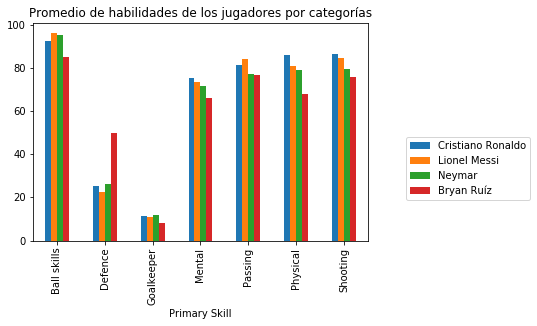

In [26]:
new_summary = new_table.groupby('Primary Skill').mean()
fig1 = new_summary.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.5,0.5))
plt.title('Promedio de habilidades de los jugadores por categorías')

De este primer gráfico ya se puede notar que aunque Bryan Ruìz es inferior a los jugadores élite en la mayoría de categorías, en las habilidades defensivas los supera ya que los otros jugadores son de un perfil mucho más ofensivo.

También se puede comparar a los jugadores en habilidades muy específicas como por ejemplo el manejo del balón. El siguiente gráfico muestra como Lionel Messi y Neymar tienen un mejor control con el balón que Cristiano Ronaldo.

Text(0.5, 1.0, 'Habilidades de los jugadores con el balón')

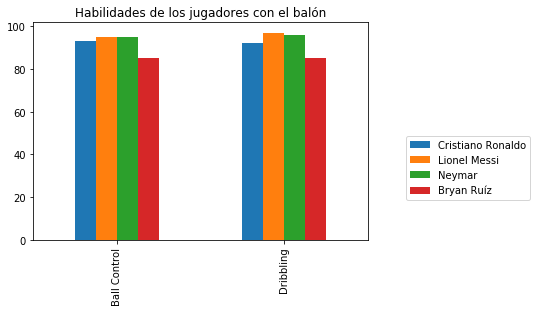

In [27]:
new_table[new_table['Primary Skill'] == 'Ball skills'].plot(kind='bar')
#fig2 = new_summary.drop(['Defence', 'Goalkeeper']).plot(kind='bar')
plt.legend(bbox_to_anchor=(1.5,0.5))
plt.xticks(numpy.arange(2), ("Ball Control", "Dribbling")) 
plt.title('Habilidades de los jugadores con el balón')

También se puede ver como en otras habilidades, Cristiano Ronaldo es superior a Messi y a Neymar.

Text(0.5, 1.0, 'Habilidades de los jugadores con el balón')

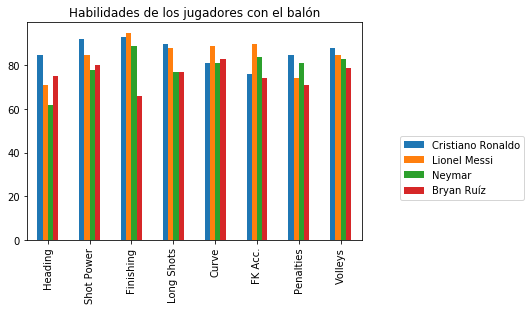

In [33]:
new_table[new_table['Primary Skill'] == 'Shooting'].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.5,0.5))
plt.xticks(numpy.arange(8), new_table[new_table['Primary Skill'] == 'Shooting']['Secondary Skill'].values) 
plt.title('Habilidades de los jugadores con el balón')

En este último gráfico incluso se puede apreciar como cabeceando, el mejor jugador es Ronaldo y en segundo lugar está Bryan Ruíz.

Por último se puede sacar el promedio general de cada jugador y ordenarlos de mejor a peor.

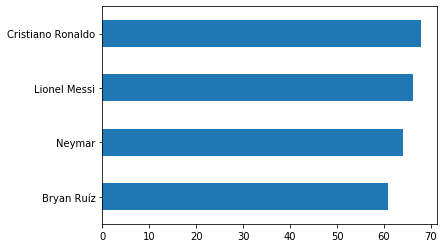

In [42]:
new_table.mean().sort_values().plot(kind='barh')